<a href="https://colab.research.google.com/github/ljabbie/lj/blob/main/prob2e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
from scipy.integrate import odeint
import scipy
import matplotlib
import copy
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})

##Case 1 adiabatic operation

Plot X(W), Xe(W), T(W) and pressure drop y(W) over a range of 
catalyst weight W [0-6000] g

In [63]:
R = 1.987                       # ideal gas constant - cal/mol/K
kT1 = 0.0002                    # Value of k at a given temperature T1 in dm^3/gmols
T1 = 300                        # Given temperature T1

CpI = 18.                       # heat capacity of inert cal/g/K 
CpA = 20.                       # heat capacity of A cal/g/K 
CpB = 20.                       # heat capacity of B cal/g/K 
CpC = 20.                       # heat capacity of C cal/g/K 
Cpcool = 18.                    # heat capacity of cooling liquid cal/mol/K 

FA0 = 5.   

ThetaI = 2.                     # ratio FI0/FA0
#CT0 = 0.3                       # initial total concentration
#ya0 = 1./(1. + ThetaB + ThetaI) # fraction of reactant A
#CA0 = ya0*CT0                   # initial concentration of reactant A
Ua = 0.2                        # U*a/rho in units of cal/ kgsK
#Ta0 = 320.                      # initial temperature of cooling liquid in K

ThetaB = 2.                     # ratio FB0/FA0
CA0 = 0.2                       # mol/dm^3
alpha = 0.00015                 # 1/kg
mc = 18.0                       # mass flow rate in g/s

T0 = 500.                       # initial temperature of reactants in K
Hr = 30000                      # DeltaHrXo - standard enthalpy of reaction in cal/mol
Ea = 20000                      # Activation energy of reaction cal/mol     

KcT2 = 0.75                     # Value of Kc at a given temperature T2
T2 = 305                        # Gi                     # initial flow rate of A
FB0 = 10.                       # initial flow rate of B
FI0 = 10.                       # initial flow rate of I


sumcp = CpA + ThetaB * CpB + ThetaI * CpI  # Sum of terms contributing to heat capacity at time 0

In [64]:
def dfdW_ad(f,W):

  X_adiabatic = copy.copy(f[0])
  y_adiabatic = copy.copy(f[1])
  
  T_ad = T0 - ((Hr*X_adiabatic)/sumcp)
  Kc_adiabatic = KcT2*np.exp(Hr/R*(1./T2 - 1/T_ad))
  k_adiabatic = kT1*np.exp((Ea/R)*(1./T1 -1/T_ad))
  Xe_adiabatic = (Kc_adiabatic**0.5) / ( 2 + (Kc_adiabatic**0.5))
  #(((ThetaB+1)*Kc)-(((((ThetaB+1)*Kc)**2)-((4*Kc*ThetaB)(Kc-4)))**.5))/(2*(Kc-4))

  dfdW_ad = np.zeros(3)
  dfdW_ad[0] = ((k_adiabatic*(CA0**2.))*(((T0/T_ad)*y_adiabatic)**2.)*((1.-X_adiabatic)*(ThetaB-X_adiabatic)-((4.*(X_adiabatic**2.))/Kc_adiabatic))) / FA0      #X
  dfdW_ad[1] = -alpha/(2. *y_adiabatic ) * (T_ad/T0)                                                  #y
  

  return dfdW_ad

In [65]:
W = np.arange(0.00001,6000.,1.)

X0 = 0.
y0 = 1.                   
W0 = 0.00001                         # g

init_values_ad = np.array([X0, y0, W0], dtype=float)
#Function to define T as a function of X
sol1 = odeint(dfdW_ad, init_values_ad, W) 
T_ad = T0 - ((Hr*sol1[:,0])/sumcp)
Kc_adiabatic = KcT2*np.exp(Hr/R*(1./T2 - 1/T_ad))
k_adiabatic = kT1*np.exp((Ea/R)*(1./T1 -1/T_ad))
Xe_adiabatic = (Kc_adiabatic**0.5) / ( 2 + (Kc_adiabatic**0.5))  
print(sol1[:,0])
print(sol1[:,1])
print(T_ad)
print(Xe_adiabatic)

[0.         0.23795438 0.2781971  ... 0.59238178 0.59238326 0.59238473]
[1.         0.99993344 0.99987064 ... 0.64928426 0.64921152 0.64913876]
[500.         425.63925481 413.06340547 ... 314.8806933  314.8802319
 314.87977071]
[0.99985167 0.99793018 0.99645352 ... 0.48492431 0.48491553 0.48490676]


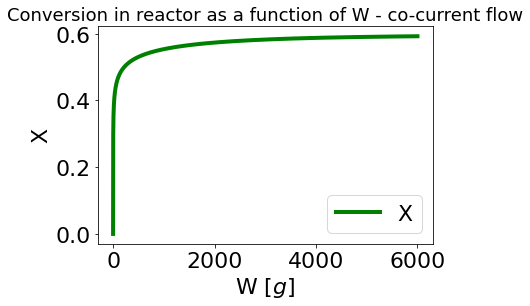

In [66]:
# Conversion as function of catalyst weight
plt.figure()
plt.plot(W,sol1[:,0],'-g', linewidth=4, label="X")   
plt.xlabel(r"W $[g]$")
plt.ylabel("X")
plt.title("Conversion in reactor as a function of W - co-current flow", fontsize = 18)
plt.legend()
plt.show()

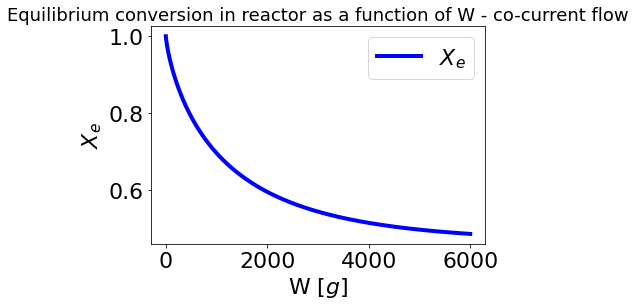

In [67]:
## Xe as a function of catalyst weight
plt.figure()
plt.plot(W, Xe_adiabatic,'-b', linewidth=4, label=r"$X_e$")
plt.xlabel(r"W $[g]$")
plt.ylabel(r"$X_e$")
plt.title("Equilibrium conversion in reactor as a function of W - co-current flow", fontsize = 18)
plt.legend()
plt.show()

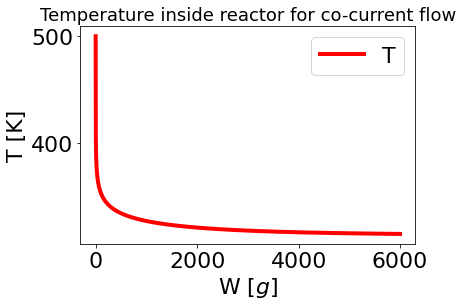

In [68]:
# Temperature in reactor as a function of catalyst weight
plt.figure()
plt.plot(W, T_ad,'-r', linewidth=4, label="T")
plt.xlabel(r"W $[g]$")
plt.ylabel("T [K]")
plt.title("Temperature inside reactor for co-current flow", fontsize = 18)
plt.legend()
plt.show()

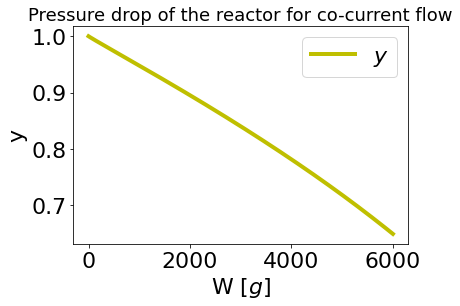

In [69]:
# Pressure drop of the reactor as a function of catalyst weight
plt.figure()
plt.plot(W,sol1[:,1], '-y', linewidth=4, label=r"$y$")
plt.title("Pressure drop of the reactor for co-current flow", fontsize=18)
plt.xlabel(r"W $[g]$")
plt.ylabel("y")
plt.legend()
plt.show()

Define parameters and functions

##2E.
# Case 2 heat effects

Define functions for the problem.

In [70]:
def Kc(T, T2, KcT2, Hr):  
  # Function of Kc as a function of T, T2, KcT2, Hr
  return KcT2*np.exp(Hr/R*(1./T2 - 1/T))

def k(T, T1, kT1, Ea):
  # Function of k as a function of T, T1, kT1, Ea 
  return kT1*np.exp((Ea/R)*(1./T1 -1/T))

def mra(X, T, T0, y, T2, KcT2, Hr, T1, kT1, Ea):
  # Function of -rA as a function of X,T,T0,y - other parameters are predefined constants
  mra_val = k(T, T1, kT1, Ea) * (  CA(CA0, X, y, T0, T) * CB(CA0, X, y, T0, T) - \
                                 ( CC(CA0, X, y, T0, T)**2/Kc(T, T2, KcT2, Hr) ) )
  return mra_val

def CA(CA0, X, y, T0, T):
  # Function to define CA as a function of CA0, X, y, T0 and T
  return CA0*(1-X)*y*T0/T

def CB(CA0, X, y, T0, T):
  # Function to define CB as a function of CA0, X, y, T0 and T
  return CA0*(ThetaB - X)*y*T0/T

def CC(CA0, X, y, T0, T):
  # Function to define CC as a function of CA0, X, y, T0 and T
  return CA0 * 2 * X * y * T0 / T

def Xe(T, T2, KcT2, Hr):
  # Function to define Xe as a function of T
  return Kc(T, T2, KcT2, Hr)**0.5 / ( 2 + Kc(T, T2, KcT2, Hr)**0.5)

In [71]:
def dfdW(f,W):

  X = copy.copy(f[0])
  y = copy.copy(f[1])
  T = copy.copy(f[2])
  Ta = copy.copy(f[3])

  KcT = Kc(T, T2, KcT2, Hr)
  kT = k(T, T1, kT1, Ea)
  mra_tmp = mra(X, T, T0, y, T2, KcT2, Hr, T1, kT1, Ea)
  
  dfdW = np.zeros(5)
  dfdW[0] = mra_tmp / FA0                                                        #X
  dfdW[1] = -alpha/(2. *y ) * (T/T0)                                             #y
  dfdW[2] = (Ua * (Ta - T) + (mra_tmp) * (-Hr)) / (FA0 * sumcp)                  #T
  dfdW[3] = Ua *(T - Ta)/(mc * Cpcool)                                           #Ta

  return dfdW

solve coupled ODE's and generate plot

In [72]:
W = np.arange(0.00001,6000.,1.)

X0 = 0.
y0 = 1.
T0 = 500.                     # K
Ta0 = 800.                    # K
W0 = 0.00001                  # g

init_values = np.array([X0, y0, T0, Ta0, W0], dtype=float)

sol = odeint(dfdW, init_values, W)

In [73]:
print(sol)

[[0.00000000e+00 1.00000000e+00 5.00000000e+02 8.00000000e+02
  1.00000000e-05]
 [2.38163558e-01 9.99933430e-01 4.25722267e+02 7.99780179e+02
  1.00000000e-05]
 [2.78638532e-01 9.99870618e-01 4.13232568e+02 7.99545023e+02
  1.00000000e-05]
 ...
 [9.99997754e-01 5.17846213e-01 4.33625521e+02 4.35370638e+02
  1.00000000e-05]
 [9.99997754e-01 5.17720594e-01 4.33626248e+02 4.35369561e+02
  1.00000000e-05]
 [9.99997754e-01 5.17594943e-01 4.33626974e+02 4.35368486e+02
  1.00000000e-05]]


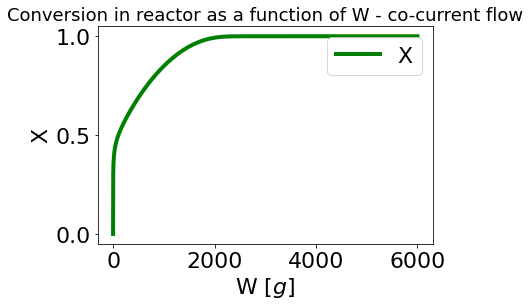

In [74]:
# Conversion as function of catalyst weight
plt.figure()
plt.plot(W,sol[:,0],'-g', linewidth=4, label="X")   
plt.xlabel(r"W $[g]$")
plt.ylabel("X")
plt.title("Conversion in reactor as a function of W - co-current flow", fontsize = 18)
plt.legend()
plt.show()

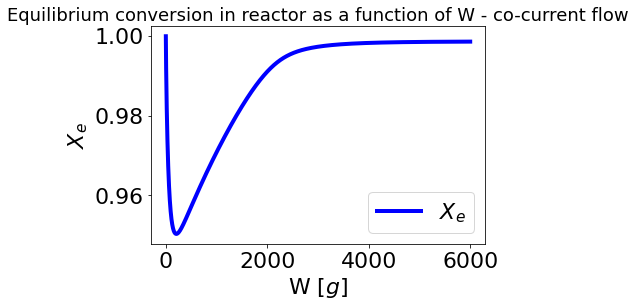

In [75]:
# Xe as a function of catalyst weight
plt.figure()
plt.plot(W,Xe(sol[:,2], T2, KcT2, Hr),'-b', linewidth=4, label=r"$X_e$")
plt.xlabel(r"W $[g]$")
plt.ylabel(r"$X_e$")
plt.title("Equilibrium conversion in reactor as a function of W - co-current flow", fontsize = 18)
plt.legend()
plt.show()

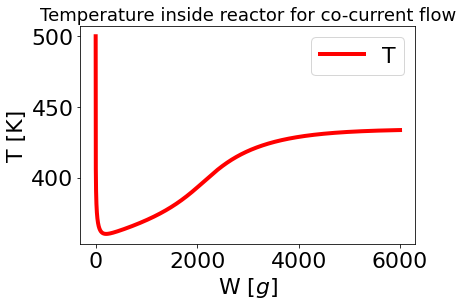

In [76]:
# Temperature in reactor as a function of catalyst weight
plt.figure()
plt.plot(W,sol[:,2],'-r', linewidth=4, label="T")
plt.xlabel(r"W $[g]$")
plt.ylabel("T [K]")
plt.title("Temperature inside reactor for co-current flow", fontsize = 18)
plt.legend()
plt.show()

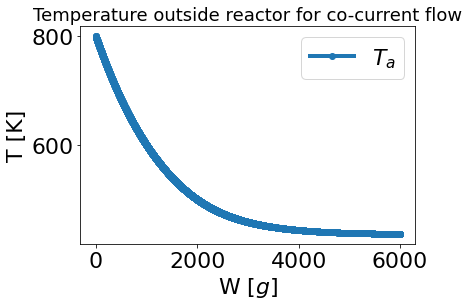

In [77]:
# Temperature outside reactor as a function of catalyst weight
plt.figure()
plt.plot(W,sol[:,3], '-o', linewidth=4, label=r"$T_a$")
plt.title("Temperature outside reactor for co-current flow", fontsize=18)
plt.xlabel(r"W $[g]$")
plt.ylabel("T [K]")
plt.legend()
plt.show()

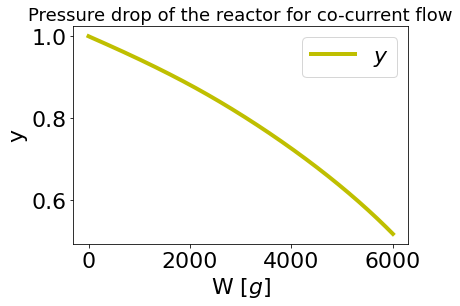

In [78]:
# Pressure drop of the reactor as a function of catalyst weight
plt.figure()
plt.plot(W,sol[:,1], '-y', linewidth=4, label=r"$y$")
plt.title("Pressure drop of the reactor for co-current flow", fontsize=18)
plt.xlabel(r"W $[g]$")
plt.ylabel("y")
plt.legend()
plt.show()